<a href="https://colab.research.google.com/github/Misharosejoseph/Linear-regression/blob/main/linear_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('/content/salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Data prerocessing

In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
data.columns


Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
data.size

60

In [8]:
data.shape

(30, 2)

In [10]:
data.dtypes

,0
YearsExperience,float64
Salary,float64


In [13]:
data.isna().sum()

,0
YearsExperience,0
Salary,0


In [14]:
data.duplicated().sum()

np.int64(0)

Correlation Analysis

In [15]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


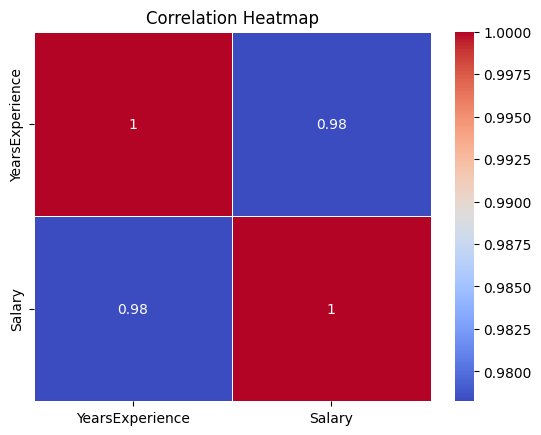

In [16]:
#correlation analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Data visualisation

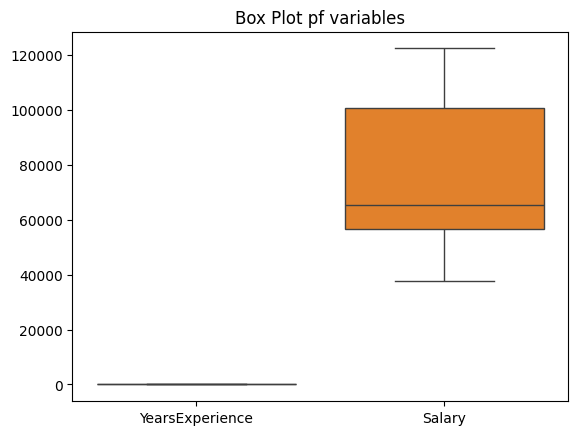

In [17]:
sns.boxplot(data=data)
plt.title('Box Plot pf variables')
plt.show()

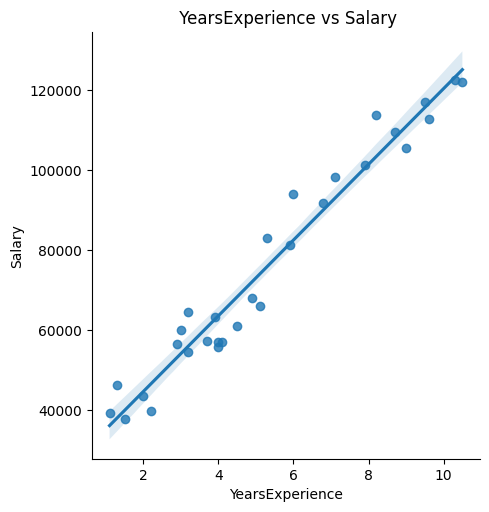

In [19]:
sns.lmplot(x= 'YearsExperience',y='Salary',data=data)
plt.title(' YearsExperience vs Salary')
plt.show()

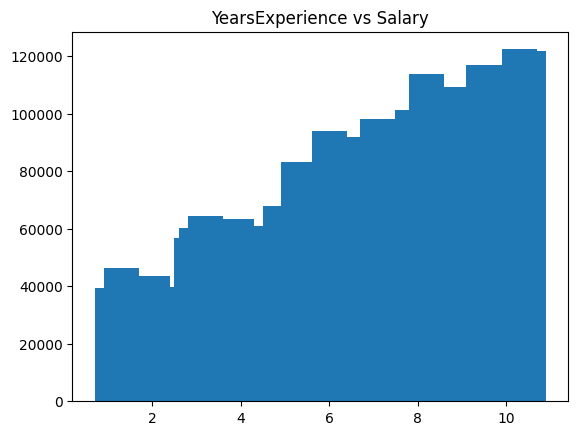

In [20]:
plt.bar(data['YearsExperience'],data['Salary'])
plt.title('YearsExperience vs Salary')
plt.show()

Splting data into input (x) and target(y) variables

In [22]:
x=  data.iloc[:,:1].values
y= data.iloc[:,:1].values
y=data['Salary']

spliting data into test data and train data

In [24]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)


In [25]:
lr=LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

prediction

In [29]:
y_pred=lr.predict(x_test)
y_pred

array([36833.63210301, 34919.71472592, 67456.3101364 , 59800.64062805,
       92337.23603852, 81810.69046455])

model coefficent and intercept


In [31]:
print("Coefficient",lr.coef_)
print("Intercept",lr.intercept_) #y=mx+c

Coefficient [9569.58688543]
Intercept 24393.169151948343


Visualisation of actual and predicted value

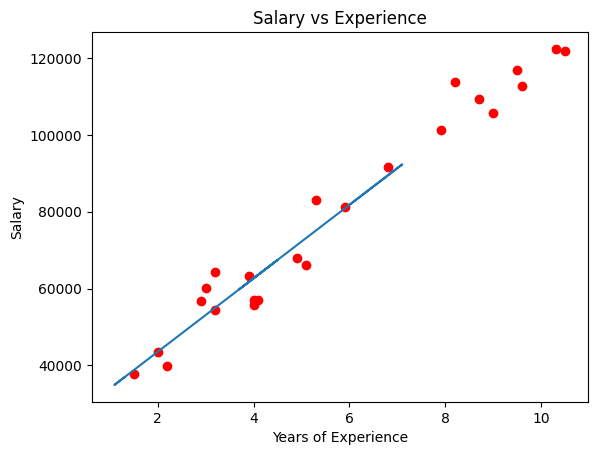

In [33]:
plt.scatter(x_train,y_train,color="red")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(x_test,y_pred)

performance metrc for mae,mse,rmse

In [36]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

6802.779572073899
56137509.997825526
7492.496913434501


creat dataframe to view result

In [39]:
Results =pd.DataFrame(columns=['Actual_Salary','Predicted_Salary'])
Results['Actual_Salary']=y_test
Results['Predicted_Salary']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head()

,index,Actual_Salary,Predicted_Salary,Id
0,1,46205.0,36833.632103,0
1,0,39343.0,34919.714726,1
2,14,61111.0,67456.310136,2
3,9,57189.0,59800.640628,3
4,21,98273.0,92337.236039,4


r2 score


In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test,y_pred)

0.8886956733784563